### 전체 기간에 대해 존재하는 충주 + 부산 데이터 우선 확인

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from datetime import datetime, timedelta

In [2]:
weather_path = '../../data/weather_data/충주'
# weather_path안에 있는 모든 csv 불러와서 concat하기
csv_files = [f for f in os.listdir(weather_path) if f.endswith('.csv')]
df_list = []
for file in csv_files:
    file_path = os.path.join(weather_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# 모든 csv 파일을 하나의 데이터프레임으로 합치기
chungju = pd.concat(df_list, ignore_index=True) 

# sort by date 
chungju = chungju.sort_values(by=['date','time']).reset_index(drop=True)
chungju

,date,time,temperature,humidity,stnNm,rn,ws,wd,pv,pa,ps,ss,icsr,dc10Tca,dc10LmcsCa,lcsCh,vs,ts,sunrise,sunset
0,20130101,00:00,-12.4,80.0,충주,NaN,1.3,90.0,1.9,1007.6,1022.9,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,07:42,17:22
1,20130101,01:00,-12.7,80.0,충주,NaN,1.2,90.0,1.8,1007.6,1022.9,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,07:42,17:22
2,20130101,02:00,-12.4,81.0,충주,NaN,1.3,90.0,1.9,1007.7,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,07:42,17:22
3,20130101,03:00,-12.8,84.0,충주,NaN,0.7,90.0,1.9,1007.4,1022.7,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,07:42,17:22
4,20130101,04:00,-12.8,83.0,충주,NaN,0.6,20.0,1.9,1006.3,1021.6,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,07:42,17:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106596,20250228,19:00,7.0,57.0,충주,NaN,1.3,70.0,5.7,1006.5,1020.6,0.0,0.02,0.0,0.0,NaN,1129.0,5.8,07:01,18:21
106597,20250228,20:00,5.1,62.0,충주,NaN,1.1,70.0,5.5,1006.3,1020.5,NaN,NaN,0.0,0.0,NaN,1599.0,4.0,07:01,18:21
106598,20250228,21:00,3.6,66.0,충주,NaN,0.8,70.0,5.2,1006.4,1020.7,NaN,NaN,0.0,0.0,NaN,1359.0,3.0,07:01,18:21
106599,20250228,22:00,2.4,72.0,충주,NaN,0.5,50.0,5.2,1007.3,1021.7,NaN,NaN,0.0,0.0,NaN,1129.0,2.0,07:01,18:21


In [3]:
weather_path = '../../data/weather_data/부산'
# weather_path안에 있는 모든 csv 불러와서 concat하기
csv_files = [f for f in os.listdir(weather_path) if f.endswith('.csv')]
df_list = []
for file in csv_files:
    file_path = os.path.join(weather_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# 모든 csv 파일을 하나의 데이터프레임으로 합치기
busan = pd.concat(df_list, ignore_index=True) 

# sort by date 
busan = busan.sort_values(by=['date','time']).reset_index(drop=True)
busan

,date,time,temperature,humidity,stnNm,rn,ws,wd,pv,pa,ps,ss,icsr,dc10Tca,dc10LmcsCa,lcsCh,vs,ts,sunrise,sunset
0,20130101,00:00,-2.3,51.0,부산,NaN,1.6,340.0,2.6,1012.5,1021.4,NaN,NaN,0.0,0.0,NaN,2000.0,-1.8,07:32,17:23
1,20130101,01:00,-2.4,54.0,부산,NaN,1.8,340.0,2.8,1012.3,1021.2,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,07:32,17:23
2,20130101,02:00,-2.5,53.0,부산,NaN,1.9,340.0,2.7,1013.3,1022.2,NaN,NaN,NaN,NaN,NaN,NaN,-2.2,07:32,17:23
3,20130101,03:00,-2.0,52.0,부산,NaN,1.7,320.0,2.8,1013.4,1022.3,NaN,NaN,6.0,6.0,10.0,2000.0,-1.5,07:32,17:23
4,20130101,04:00,-2.3,54.0,부산,NaN,2.1,320.0,2.8,1013.0,1021.9,NaN,NaN,0.0,0.0,NaN,2000.0,-2.4,07:32,17:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106603,20250228,19:00,11.1,78.0,부산,NaN,4.5,230.0,10.3,1011.4,1019.8,0.0,0.02,0.0,0.0,NaN,1536.0,9.9,06:55,18:18
106604,20250228,20:00,10.7,82.0,부산,NaN,2.8,200.0,10.5,1011.6,1020.1,NaN,NaN,0.0,0.0,NaN,1132.0,8.6,06:55,18:18
106605,20250228,21:00,10.4,82.0,부산,NaN,2.8,230.0,10.3,1011.6,1020.1,NaN,NaN,0.0,0.0,NaN,1066.0,7.6,06:55,18:18
106606,20250228,22:00,10.5,75.0,부산,NaN,2.7,230.0,9.5,1011.7,1020.2,NaN,NaN,0.0,0.0,NaN,1042.0,6.8,06:55,18:18


In [22]:
# 두 지역의 데이터 합침
weather_data = pd.concat([chungju,busan])
if len(chungju)+len(busan) != len(weather_data):
    raise ValueError("Data concatenation error: lengths do not match.")
weather_data    

,date,time,temperature,humidity,stnNm,rn,ws,wd,pv,pa,ps,ss,icsr,dc10Tca,dc10LmcsCa,lcsCh,vs,ts,sunrise,sunset
0,20130101,00:00,-12.4,80.0,충주,NaN,1.3,90.0,1.9,1007.6,1022.9,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,07:42,17:22
1,20130101,01:00,-12.7,80.0,충주,NaN,1.2,90.0,1.8,1007.6,1022.9,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,07:42,17:22
2,20130101,02:00,-12.4,81.0,충주,NaN,1.3,90.0,1.9,1007.7,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,07:42,17:22
3,20130101,03:00,-12.8,84.0,충주,NaN,0.7,90.0,1.9,1007.4,1022.7,NaN,NaN,NaN,NaN,NaN,NaN,-6.0,07:42,17:22
4,20130101,04:00,-12.8,83.0,충주,NaN,0.6,20.0,1.9,1006.3,1021.6,NaN,NaN,NaN,NaN,NaN,NaN,-5.9,07:42,17:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106603,20250228,19:00,11.1,78.0,부산,NaN,4.5,230.0,10.3,1011.4,1019.8,0.0,0.02,0.0,0.0,NaN,1536.0,9.9,06:55,18:18
106604,20250228,20:00,10.7,82.0,부산,NaN,2.8,200.0,10.5,1011.6,1020.1,NaN,NaN,0.0,0.0,NaN,1132.0,8.6,06:55,18:18
106605,20250228,21:00,10.4,82.0,부산,NaN,2.8,230.0,10.3,1011.6,1020.1,NaN,NaN,0.0,0.0,NaN,1066.0,7.6,06:55,18:18
106606,20250228,22:00,10.5,75.0,부산,NaN,2.7,230.0,9.5,1011.7,1020.2,NaN,NaN,0.0,0.0,NaN,1042.0,6.8,06:55,18:18


In [23]:

# 1. 결측치 분석
# 각 열의 결측치 개수와 퍼센트 계산
missing_percent = round(weather_data.isnull().mean() * 100, 1)
missing_count = weather_data.isnull().sum()

# 결과를 DataFrame으로 정리
missing_df = pd.DataFrame({
    'missing_percent': missing_percent,
    'missing_count': missing_count,
}).reset_index().rename(columns={'index': 'column'})

# 결측 퍼센트 내림차순 정렬
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
print("\n결측치 분석:")
print(missing_df)

# 2. 날짜/시간 처리
# datetime 열 생성
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y%m%d')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M').dt.time
weather_data['datetime'] = pd.to_datetime(
    weather_data['date'].astype(str) + ' ' + 
    weather_data['time'].astype(str)
)

# 시간 관련 특성 추출
weather_data['hour'] = weather_data['datetime'].dt.hour
weather_data['day_of_year'] = weather_data['datetime'].dt.dayofyear
weather_data['month'] = weather_data['datetime'].dt.month
weather_data['year'] = weather_data['datetime'].dt.year
weather_data['day_of_week'] = weather_data['datetime'].dt.dayofweek

# 3. 결측치가 40% 이상인 변수 제외
high_missing_cols = missing_df[missing_df['missing_percent'] >= 40]['column'].tolist()
print(f"\n결측치가 40% 이상인 변수 (제외할 변수): {high_missing_cols}")

# 제외할 변수 목록에서 중요 변수 확인
critical_vars = ['temperature', 'humidity', 'ws', 'pa', 'ps']
excluded_critical = [col for col in high_missing_cols if col in critical_vars]
if excluded_critical:
    print(f"주의: 결측치가 많지만 중요한 변수입니다. 이 변수들은 제외하지 않습니다: {excluded_critical}")
    # 중요 변수는 제외 목록에서 제거
    high_missing_cols = [col for col in high_missing_cols if col not in critical_vars]

# 변수 제외
data_reduced = weather_data.drop(columns=high_missing_cols)

# 4. 일출/일몰 시간 처리
# 시간 문자열을 분 단위로 변환
def time_to_minutes(time_str):
    if pd.isna(time_str):
        return np.nan
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# 일출/일몰 시간 처리 (format='%H:%M' 가정)
if 'sunrise' in data_reduced.columns:
    data_reduced['sunrise_minutes'] = data_reduced['sunrise'].apply(time_to_minutes)
    # 원본 열 삭제
    data_reduced = data_reduced.drop(columns=['sunrise'])

if 'sunset' in data_reduced.columns:
    data_reduced['sunset_minutes'] = data_reduced['sunset'].apply(time_to_minutes)
    # 원본 열 삭제
    data_reduced = data_reduced.drop(columns=['sunset'])

# 5. 주기적 특성 인코딩 (시간, 월, 일 등)
# 시간 -> 사인/코사인 변환 (주기성 표현)
data_reduced['hour_sin'] = np.sin(2 * np.pi * data_reduced['hour'] / 24)
data_reduced['hour_cos'] = np.cos(2 * np.pi * data_reduced['hour'] / 24)

# 연중 날짜 -> 사인/코사인 변환
data_reduced['day_of_year_sin'] = np.sin(2 * np.pi * data_reduced['day_of_year'] / 365)
data_reduced['day_of_year_cos'] = np.cos(2 * np.pi * data_reduced['day_of_year'] / 365)

# 월 -> 사인/코사인 변환
data_reduced['month_sin'] = np.sin(2 * np.pi * data_reduced['month'] / 12)
data_reduced['month_cos'] = np.cos(2 * np.pi * data_reduced['month'] / 12)

# 요일 -> 사인/코사인 변환
data_reduced['day_of_week_sin'] = np.sin(2 * np.pi * data_reduced['day_of_week'] / 7)
data_reduced['day_of_week_cos'] = np.cos(2 * np.pi * data_reduced['day_of_week'] / 7)

# 6. 범주형 변수 처리
# stnNm(관측소명) -> One-Hot 인코딩
data_reduced = pd.get_dummies(data_reduced, columns=['stnNm'], prefix='station')

# 7. 결측치 처리 전략 수립
# 7.1. 0으로 대체할 변수 (값이 없음 = 현상 없음)
zero_replacement_vars = ['rn']
if 'icsr' in data_reduced.columns:
    zero_replacement_vars.append('icsr')
if 'ss' in data_reduced.columns:
    zero_replacement_vars.append('ss')

for var in zero_replacement_vars:
    if var in data_reduced.columns:
        data_reduced[var] = data_reduced[var].fillna(0)

# 7.2. 시계열 보간법으로 처리할 변수
# 시계열 순서대로 정렬
data_reduced = data_reduced.sort_values(by='datetime')

# 시계열 데이터에 적합한 보간법 사용
interpolation_vars = [
    'temperature', 'humidity', 'ws', 'wd', 'pv', 'pa', 'ps', 'ts'
]

# 존재하는 변수만 처리
interpolation_vars = [var for var in interpolation_vars if var in data_reduced.columns]

# 관측소별로 그룹화하여 보간
# 각 관측소 내에서 시계열 순서대로 보간
# 관측소별 보간 (더 안전한 방법)
station_cols = [col for col in data_reduced.columns if col.startswith('station_')]

if station_cols:
    for station in station_cols:
        # 각 관측소별 마스크
        mask = data_reduced[station] == 1
        
        if mask.any():  # 해당 관측소 데이터가 있는 경우에만
            # 해당 관측소 데이터만 필터링
            station_data = data_reduced.loc[mask].copy()
            
            # 날짜별로 정렬
            station_data = station_data.sort_values(by='datetime')
            
            # 각 변수에 대해 보간
            for var in interpolation_vars:
                if var in station_data.columns:
                    # 선형 보간 적용
                    station_data[var] = station_data[var].interpolate(method='linear')
            
            # 보간된 값을 원본 데이터에 복사
            for var in interpolation_vars:
                if var in station_data.columns:
                    data_reduced.loc[mask, var] = station_data[var]
else:
    # 관측소 구분 없이 전체 데이터셋에 보간 적용
    for var in interpolation_vars:
        if var in data_reduced.columns:
            data_reduced[var] = data_reduced[var].interpolate(method='time')

# 7.3. 나머지 변수는 KNN 방식으로 처리
# 보간 후에도 남아있는 결측치를 확인
remaining_missing = data_reduced.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

if len(remaining_missing) > 0:
    print("\n보간 후에도 남아있는 결측치:")
    print(remaining_missing)
    
    # 결측치가 있는 변수 목록
    vars_with_missing = remaining_missing.index.tolist()
    
    # 수치형 변수만 선택
    numeric_vars_with_missing = []
    for var in vars_with_missing:
        if pd.api.types.is_numeric_dtype(data_reduced[var]):
            numeric_vars_with_missing.append(var)
    
    if numeric_vars_with_missing:
        # KNN Imputer 사용
        # 수치형 변수만 선택
        numeric_data = data_reduced[numeric_vars_with_missing]
        
        # KNN Imputer 적용
        imputer = KNNImputer(n_neighbors=5)
        imputed_data = imputer.fit_transform(numeric_data)
        
        # 원본 데이터에 대체
        data_reduced[numeric_vars_with_missing] = imputed_data

# 8. 최종 결측치 확인
final_missing = data_reduced.isnull().sum()
final_missing = final_missing[final_missing > 0]

if len(final_missing) > 0:
    print("\n최종적으로 남아있는 결측치:")
    print(final_missing)
    
    # 남아있는 결측치가 있는 경우 마지막 처리
    # 각 변수 타입에 맞는 대체값 사용
    for var in final_missing.index:
        if pd.api.types.is_numeric_dtype(data_reduced[var]):
            # 수치형 변수는 중앙값으로 대체
            data_reduced[var] = data_reduced[var].fillna(data_reduced[var].median())
        else:
            # 범주형 변수는 최빈값으로 대체
            data_reduced[var] = data_reduced[var].fillna(data_reduced[var].mode()[0])

# 9. 특성 선택 및 엔지니어링
# 태양광 발전과 관련된 유용한 추가 특성 생성

# 9.1. 낮/밤 구분 특성 추가
if 'sunrise_minutes' in data_reduced.columns and 'sunset_minutes' in data_reduced.columns:
    # 현재 시간 (분 단위)
    data_reduced['current_time_minutes'] = data_reduced['hour'] * 60
    
    # 낮시간 여부 (1=낮, 0=밤)
    data_reduced['is_daytime'] = ((data_reduced['current_time_minutes'] >= data_reduced['sunrise_minutes']) & 
                                 (data_reduced['current_time_minutes'] <= data_reduced['sunset_minutes'])).astype(int)
    
    # 일조 시간 (일몰 - 일출)
    data_reduced['daylight_duration'] = data_reduced['sunset_minutes'] - data_reduced['sunrise_minutes']
    
    # 원본 시간 특성 삭제
    data_reduced = data_reduced.drop(columns=['current_time_minutes'])

# 9.2. 온도 관련 파생 변수
if 'temperature' in data_reduced.columns:
    # 하루 중 온도 변화 (이전 시간과의 차이)
    data_reduced['temp_change'] = data_reduced.groupby(data_reduced['date'].dt.date)['temperature'].diff()
    
    # 결측치 처리
    data_reduced['temp_change'] = data_reduced['temp_change'].fillna(0)

# 9.3. 특정 임계값 초과 여부
if 'temperature' in data_reduced.columns:
    data_reduced['temp_over_25'] = (data_reduced['temperature'] > 25).astype(int)
    data_reduced['temp_below_0'] = (data_reduced['temperature'] < 0).astype(int)

if 'ws' in data_reduced.columns:
    data_reduced['high_wind'] = (data_reduced['ws'] > 5).astype(int)  # 풍속 5 이상 강풍

# 10. 수치형 변수 정규화
# 정규화할 수치형 변수 선택
numeric_cols = data_reduced.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 정규화에서 제외할 변수
exclude_from_scaling = ['year', 'month', 'day_of_year', 'hour', 'day_of_week', 'is_daytime']
exclude_from_scaling += [col for col in data_reduced.columns if col.startswith('station_')]
exclude_from_scaling += [col for col in data_reduced.columns if 'sin' in col or 'cos' in col]
exclude_from_scaling += ['temp_over_25', 'temp_below_0', 'high_wind']  # 이진 변수

# 정규화할 최종 변수 목록
scaling_cols = [col for col in numeric_cols if col not in exclude_from_scaling]

# 스케일러 객체 생성
scaler = MinMaxScaler()

# 정규화 적용
data_reduced[scaling_cols] = scaler.fit_transform(data_reduced[scaling_cols])

# 11. 태양광 발전량 데이터 예시 (실제로는 외부 데이터 로드)
# 이 부분은 실제 태양광 발전량 데이터를 로드하는 코드로 대체해야 함
# 여기서는 예시로 가상의 데이터를 생성
solar_power = pd.DataFrame({
    'date': pd.date_range(start=data_reduced['date'].min(), end=data_reduced['date'].max()),
    'plant_id': 'plant_1',
    'power_output': np.random.rand(len(pd.date_range(start=data_reduced['date'].min(), end=data_reduced['date'].max()))) * 100
})

# 12. 최종 데이터셋 생성
# 필요한 특성만 선택
selected_features = [
    # 날짜/시간 관련
    'datetime', 'date', 'hour_sin', 'hour_cos', 'day_of_year_sin', 'day_of_year_cos', 
    'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
    
    # 기상 변수
    'temperature', 'humidity', 'ws', 'wd', 'pv', 'pa', 'ps', 'rn', 'ts',
    
    # 태양 관련
    'is_daytime', 'daylight_duration',
    
    # 파생 변수
    'temp_change', 'temp_over_25', 'temp_below_0', 'high_wind',
    
    # 관측소 정보
] + [col for col in data_reduced.columns if col.startswith('station_')]

# 존재하는 특성만 선택
final_features = [col for col in selected_features if col in data_reduced.columns]

# 최종 데이터셋
final_data = data_reduced[final_features]

# 13. 모델 입력 데이터 형태로 변환 (전날 데이터 -> 다음날 발전량 예측)
def create_model_dataset(weather_df, solar_df, plant_id='plant_1', seq_length=24, forecast_horizon=24):
    """
    전날 24시간 날씨 데이터를 입력으로, 다음날 24시간 태양광 발전량을 출력으로 하는 데이터셋 생성
    
    Args:
        weather_df: 전처리된 날씨 데이터프레임
        solar_df: 태양광 발전량 데이터프레임
        plant_id: 발전소 ID (여러 발전소가 있는 경우)
        seq_length: 입력 시퀀스 길이 (기본 24시간)
        forecast_horizon: 예측 기간 (기본 24시간)
    
    Returns:
        X: 입력 특성 배열 (샘플 수, 시퀀스 길이, 특성 수)
        y: 타겟 배열 (샘플 수, 예측 기간)
        dates: 각 샘플의 날짜
    """
    # 날짜별로 그룹화
    grouped_weather = weather_df.groupby(weather_df['date'].dt.date)
    
    # 태양광 발전량 데이터 가공
    solar_df['date'] = pd.to_datetime(solar_df['date']).dt.date
    
    # 발전소 필터링 (여러 발전소가 있는 경우)
    if 'plant_id' in solar_df.columns:
        solar_df = solar_df[solar_df['plant_id'] == plant_id]
    
    # 날짜별 태양광 발전량 그룹화
    solar_grouped = solar_df.groupby('date')['power_output'].apply(list).to_dict()
    
    # 특성 열 (datetime과 date 제외)
    feature_cols = [col for col in weather_df.columns if col not in ['datetime', 'date']]
    
    X = []  # 입력 데이터
    y = []  # 출력 데이터 (다음날 발전량)
    dates = []  # 각 샘플의 날짜
    
    # 모든 날짜 목록
    all_dates = sorted(grouped_weather.groups.keys())
    
    for i in range(len(all_dates) - 1):  # 마지막 날은 다음날 데이터가 없으므로 제외
        current_date = all_dates[i]
        next_date = all_dates[i + 1]
        
        # 현재 날짜의 날씨 데이터
        current_weather = grouped_weather.get_group(current_date)
        
        # 24시간 데이터가 모두 있는지 확인
        if len(current_weather) != seq_length:
            continue
        
        # 다음날 태양광 발전량
        if next_date in solar_grouped:
            next_day_solar = solar_grouped[next_date]
            
            # 예측 기간에 맞게 데이터가 있는지 확인
            if len(next_day_solar) == forecast_horizon:
                # 입력 특성 추출
                X_sample = current_weather[feature_cols].values
                
                # 타겟 추출
                y_sample = np.array(next_day_solar)
                
                X.append(X_sample)
                y.append(y_sample)
                dates.append(current_date)
    
    # 배열로 변환
    X = np.array(X)
    y = np.array(y)
    
    return X, y, dates

# 모델 입력 데이터셋 생성
X, y, dates = create_model_dataset(final_data, solar_power)

print(f"\n최종 입력 데이터 형태: {X.shape}")
print(f"최종 출력 데이터 형태: {y.shape}")

# 14. 데이터 저장
# 전처리된 테이블형 데이터 저장
final_data.to_csv('preprocessed_weather_data.csv', index=False)

# 모델 입력용 데이터 저장
np.save('model_input_X.npy', X)
np.save('model_target_y.npy', y)

# 날짜 정보 저장
pd.DataFrame({'date': dates}).to_csv('model_dates.csv', index=False)

# 스케일러 저장
import joblib
joblib.dump(scaler, 'weather_scaler.pkl')

print("\n전처리 완료! 데이터가 저장되었습니다.")
print("1. preprocessed_weather_data.csv - 전처리된 테이블형 날씨 데이터")
print("2. model_input_X.npy - 모델 입력 특성 (전날 24시간 데이터)")
print("3. model_target_y.npy - 모델 타겟 (다음날 24시간 발전량)")
print("4. model_dates.csv - 각 샘플의 날짜 정보")
print("5. weather_scaler.pkl - 정규화에 사용된 스케일러 (예측시 역변환용)")


결측치 분석:
         column  missing_percent  missing_count
5            rn             91.4         194951
12         icsr             66.0         140774
15        lcsCh             62.0         132089
11           ss             45.9          97766
13      dc10Tca             27.9          59424
14   dc10LmcsCa             25.8          54987
16           vs             10.8          23084
7            wd              0.2            347
9            pa              0.1            264
17           ts              0.1            151
10           ps              0.0            102
6            ws              0.0             83
8            pv              0.0             73
3      humidity              0.0             71
2   temperature              0.0             16
18      sunrise              0.0              0
0          date              0.0              0
1          time              0.0              0
4         stnNm              0.0              0
19       sunset              0.

In [26]:
final_data.to_parquet('../../data/weather_data/tmp_weather/chungju_busan_weather.parquet', index=False)
final_data

,datetime,date,hour_sin,hour_cos,day_of_year_sin,day_of_year_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos,...,ps,ts,is_daytime,daylight_duration,temp_change,temp_over_25,temp_below_0,high_wind,station_부산,station_충주
0,2013-01-01 00:00:00,2013-01-01,0.000000,1.000000,0.017213,0.999852,0.500000,0.866025,0.781831,0.623490,...,0.781211,0.070694,0,0.009804,0.501416,0,1,0,0,1
0,2013-01-01 00:00:00,2013-01-01,0.000000,1.000000,0.017213,0.999852,0.500000,0.866025,0.781831,0.623490,...,0.762670,0.124679,0,0.045752,0.787535,0,1,0,1,0
1,2013-01-01 01:00:00,2013-01-01,0.258819,0.965926,0.017213,0.999852,0.500000,0.866025,0.781831,0.623490,...,0.781211,0.071979,0,0.009804,0.206799,0,1,0,0,1
1,2013-01-01 01:00:00,2013-01-01,0.258819,0.965926,0.017213,0.999852,0.500000,0.866025,0.781831,0.623490,...,0.760198,0.120823,0,0.045752,0.793201,0,1,0,1,0
2,2013-01-01 02:00:00,2013-01-01,0.500000,0.866025,0.017213,0.999852,0.500000,0.866025,0.781831,0.623490,...,0.782447,0.071979,0,0.009804,0.218130,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106605,2025-02-28 21:00:00,2025-02-28,-0.707107,0.707107,0.849817,0.527078,0.866025,0.500000,-0.433884,-0.900969,...,0.746601,0.245501,0,0.346405,0.694051,0,0,0,1,0
106606,2025-02-28 22:00:00,2025-02-28,-0.500000,0.866025,0.849817,0.527078,0.866025,0.500000,-0.433884,-0.900969,...,0.747837,0.235219,0,0.346405,0.504249,0,0,0,1,0
106599,2025-02-28 22:00:00,2025-02-28,-0.500000,0.866025,0.849817,0.527078,0.866025,0.500000,-0.433884,-0.900969,...,0.766378,0.173522,0,0.336601,0.271955,0,0,0,0,1
106600,2025-02-28 23:00:00,2025-02-28,-0.258819,0.965926,0.849817,0.527078,0.866025,0.500000,-0.433884,-0.900969,...,0.768850,0.164524,0,0.336601,0.473088,0,0,0,0,1


## 위 코드에서 보완해야할 점
1. train, test 미리 나눈 후에 imputation하기
2. imputation시 각 변수별로 min, max 값 설정하기

### 예전에 결측 관련 확인한 거

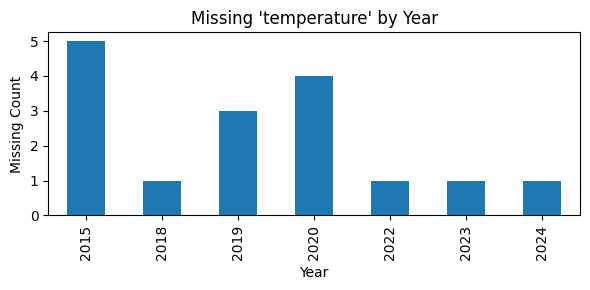

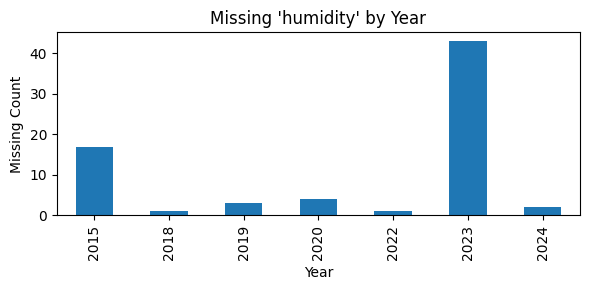

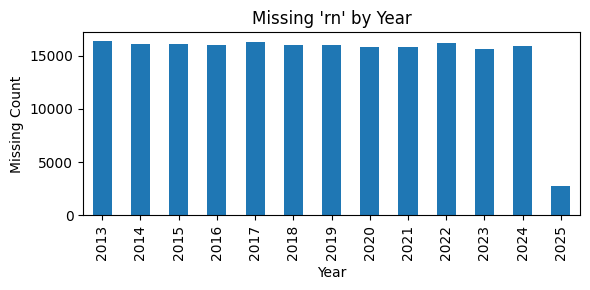

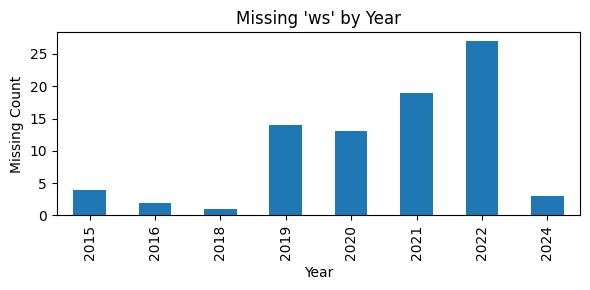

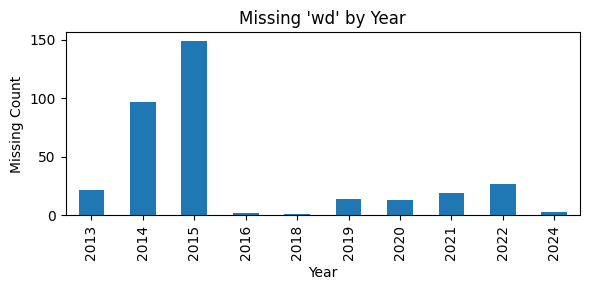

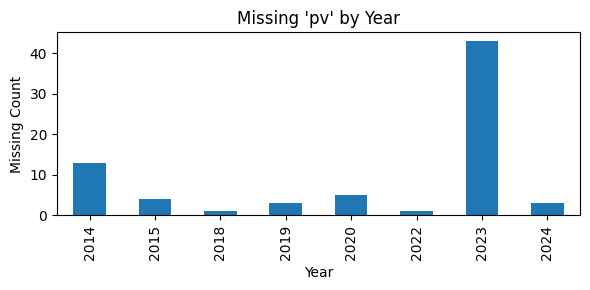

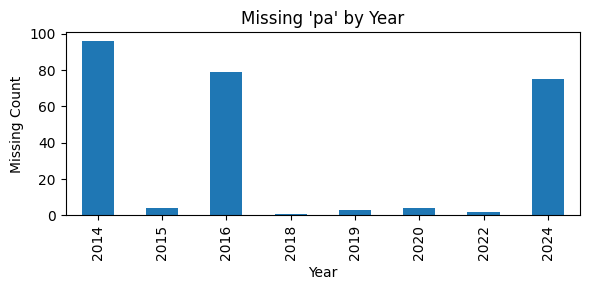

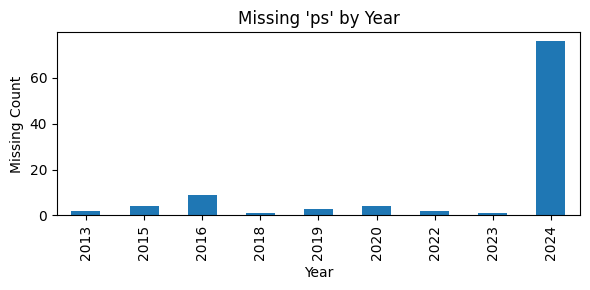

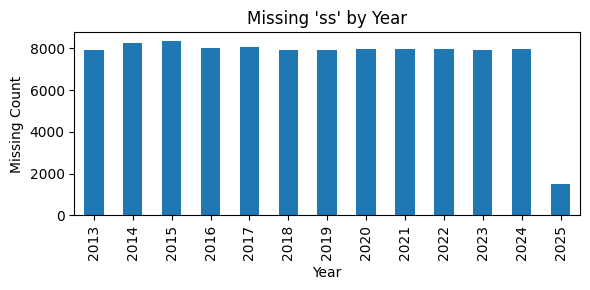

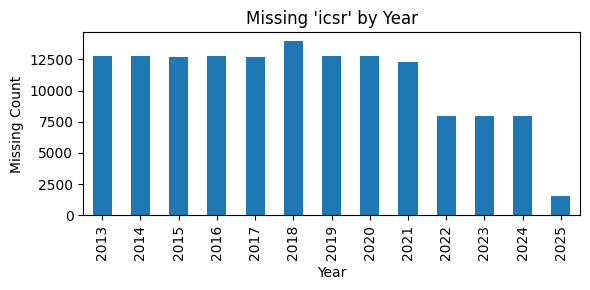

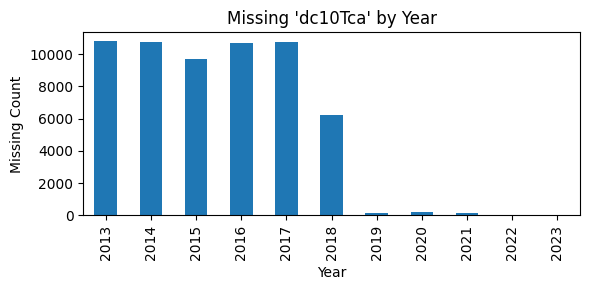

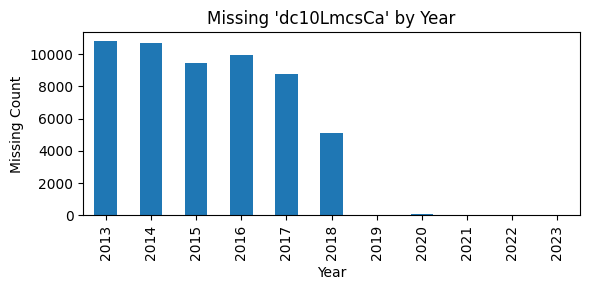

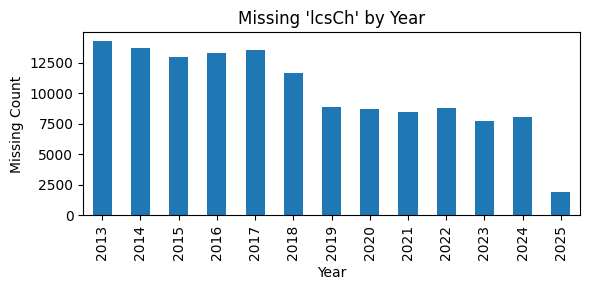

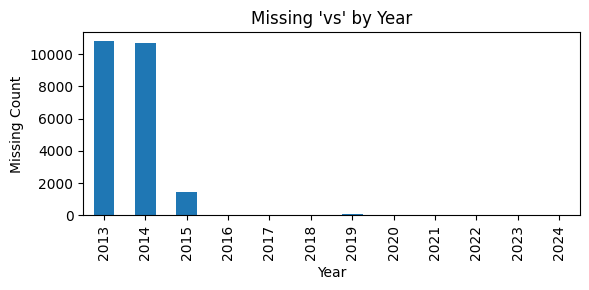

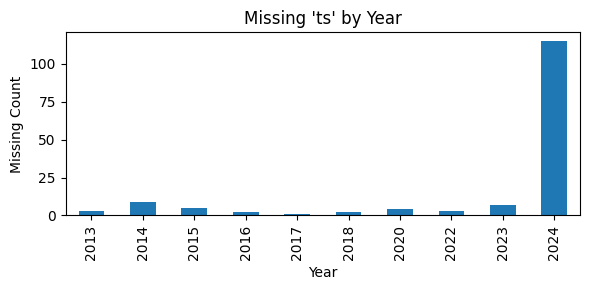

In [8]:
# date에서 year 정보 추출하여 새로운 컬럼 추가
weather_data['year'] = weather_data['date'].astype(str).str[:4]

import matplotlib.pyplot as plt

# temperature부터 오른쪽으로 쭉 모든 column에 대해 결측치의 연도별 분포 시각화
start_col = weather_data.columns.get_loc('temperature')
cols_to_check = weather_data.columns[start_col:]

for col in cols_to_check:
    # 결측치인 행만 추출
    missing_rows = weather_data[weather_data[col].isna()]
    if len(missing_rows) > 0:
        # 연도별 결측치 개수 세기
        year_counts = missing_rows['year'].value_counts().sort_index()
        
        plt.figure(figsize=(6,3))
        year_counts.plot(kind='bar')
        plt.title(f"Missing '{col}' by Year")
        plt.xlabel('Year')
        plt.ylabel('Missing Count')
        plt.tight_layout()
        plt.show()


In [10]:
# 각 column별 결측치 개수와 결측 퍼센트 계산
missing_percent = round(weather_data.isnull().mean() * 100,1)
missing_count = weather_data.isnull().sum()

# 결과를 DataFrame으로 정리
missing_df = pd.DataFrame({
    'missing_percent': missing_percent,
    'missing_count': missing_count,
}).reset_index().rename(columns={'index': 'column'})

# 결측 퍼센트 내림차순 정렬
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
missing_df


,column,missing_percent,missing_count
5,rn,91.4,194951
12,icsr,66.0,140774
15,lcsCh,62.0,132089
11,ss,45.9,97766
13,dc10Tca,27.9,59424
14,dc10LmcsCa,25.8,54987
16,vs,10.8,23084
7,wd,0.2,347
9,pa,0.1,264
17,ts,0.1,151
